***1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.***

In [99]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [100]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Стандартизация 

In [101]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [102]:
X_st = X.copy()
X_st = X_st.astype(np.float64)

In [103]:
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

L2 регуляризация

In [104]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [105]:
def gradient_descent_reg_l2(X, y, reg, iterations, eta=1e-3):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [106]:
gradient_descent_reg_l2(X_st, y, reg=1e-4, iterations=5000)

Final MSE: 25.270442427679008


array([56.49462422,  5.96292624,  1.09678838,  5.4091076 ])

Final MSE: 25.290040772341207
Final MSE: 25.234554957253785
Final MSE: 25.22745824930221
Final MSE: 25.189519209914206
Final MSE: 25.11867111635238
Final MSE: 25.160724244028334
Final MSE: 25.408998908725582
Final MSE: 25.222186255238732
Final MSE: 25.308545764671116
Final MSE: 25.24505353797361
Final MSE: 25.316390648563853
Final MSE: 25.181692298346118
Final MSE: 25.39072610860514
Final MSE: 25.261477600772583
Final MSE: 25.17766819396861
Final MSE: 25.33824144008756
Final MSE: 25.28186879369211
Final MSE: 25.322320325064283
Final MSE: 25.353720284725192
Final MSE: 25.33588405839368
Final MSE: 25.527251494293417
Final MSE: 25.532037758487558
Final MSE: 25.40583427287358
Final MSE: 25.54428195251173
Final MSE: 25.893715133630092
Final MSE: 26.361149522203192
Final MSE: 27.490962266666475
Final MSE: 29.578531238018655
Final MSE: 32.851455447233874
Final MSE: 39.305552316249006
Final MSE: 50.788658705631335
Final MSE: 71.14125786016331
Final MSE: 105.74882702670982
Final MSE: 162.846467

Text(0, 0.5, 'Вес признака')

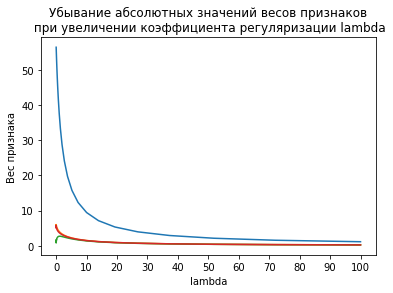

In [107]:
n = 50 # количество разных lambda

coeffs = np.zeros((n, X_st.shape[1]))
lambda_list = np.logspace(-5, 2, n) # lambda от 1е-5 до 50

for i, val in enumerate(lambda_list):    
    coeffs[i, :] = gradient_descent_reg_l2(X_st, y, reg=val, iterations=5000)

for i in range(X_st.shape[1]):
    plt.plot(lambda_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации lambda')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('lambda')
plt.ylabel('Вес признака')

Вывод:
Как видно из графика, при увеличении lambda веса признаков стремятся к 0, при маленьких значениях lambda вес одного из признаков слишком большой.

***2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.***

In [108]:
def gradient_descent_reg_l1(X, y, reg, iterations, eta=1e-3):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W / np.sqrt(sum([i ** 2 for i in W])) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [109]:
gradient_descent_reg_l1(X_st, y, reg=1e-4, iterations=5000)

Final MSE: 25.527397034853728


array([56.49741921,  5.79502316,  1.55278123,  5.1029465 ])

****3. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?***

Стандартизация и нормализация не дополняют друг друга. Каждый из методов приводит признаки к опеределенной 
единой шкале, поэтому их одновременное использование представляется бессмысленным. Убедимся в этом.

In [111]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [112]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)

In [113]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm  # нормализованные данные

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [114]:
X_st # посмотрим еще раз на данные после стандартизации

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [115]:
# Попробуем нормализовать данные после стандартизации
X_st_norm = X_st.copy()
X_st_norm[:, 1] = min_max_scale(X_st_norm[:, 1])
X_st_norm[:, 2] = min_max_scale(X_st_norm[:, 2])
X_st_norm[:, 3] = min_max_scale(X_st_norm[:, 3])
X_st_norm  

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [116]:
# Попробуем стандартизировать данные после нормализации
X_norm_st = X_norm.copy()
X_norm_st[:, 1] = standard_scale(X_norm_st[:, 1])
X_norm_st[:, 2] = standard_scale(X_norm_st[:, 2])
X_norm_st[:, 3] = standard_scale(X_norm_st[:, 3])
X_norm_st 

array([[ 1.00000000e+00, -7.07106781e-01, -9.79589689e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -7.07106781e-01, -5.67130873e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -3.53553391e-01, -4.64016169e-01,
         3.84110640e-01],
       [ 1.00000000e+00,  7.07106781e-01, -7.73360281e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -1.96261557e-16,  9.79589689e-01,
         3.84110640e-01],
       [ 1.00000000e+00, -1.06066017e+00, -3.60901465e-01,
        -8.96258160e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.08270439e+00,
         1.66447944e+00],
       [ 1.00000000e+00,  2.47487373e+00,  2.11385144e+00,
         1.66447944e+00],
       [ 1.00000000e+00, -7.07106781e-01, -1.08270439e+00,
        -8.96258160e-01],
       [ 1.00000000e+00, -3.53553391e-01,  5.15573521e-02,
         3.84110640e-01]])

Ответ: как видно, нет никакого смысла масштабировать признаки, применяя сразу 2 метода. 

***4.*Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.***

In [158]:
X_, Y_, coef_ = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X_[:, 0] *= 10

In [137]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(X_, axis=0)
stds = np.std(X_, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
display(means, stds)

array([-0.79012702,  0.02045785])

array([9.85635367, 0.99101454])

In [138]:
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(X_.shape[0]):
    for j in range(X_.shape[1]):
        X_[i][j] = (X_[i][j] - means[j]) / stds[j]

In [139]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Градиентный спуск

In [153]:
%%time

w = np.zeros(X_st_.shape[1])
w_list = [w.copy()]
errors_1 = []
eta = 0.001
max_iter = 1e3
min_weight_dist = 1e-8   # критерий сходимости (разница весов, при которой алгоритм останавливается)
weight_dist = np.inf   # зададим начальную разницу весов большим числом
iter_num = 0   # счетчик итераций

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    y_pred = np.dot(X_st_, w)
    new_w = w - eta * 2 / Y_.shape[0] * np.dot(X_st_.T, y_pred - Y_)

    weight_dist = np.linalg.norm(new_w - w, ord=2)
 
    error = mserror(X_st_, new_w, Y_)
    
    w_list.append(new_w.copy())
    errors_1.append(error)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')

    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
print(f'В случае использования градиентного спуска ошибка составляет {round(errors_1[-1], 4)}')

Iteration #0: W_new = [1.18435438 0.13103061], MSE = 6907.93
Iteration #100: W_new = [ 6.0869232  12.28202471], MSE = 3105.35
Iteration #200: W_new = [ 6.11295483 22.27504928], MSE = 2104.51
Iteration #300: W_new = [ 6.13434101 30.48477841], MSE = 1429.0
Iteration #400: W_new = [ 6.15191074 37.22944836], MSE = 973.08
Iteration #500: W_new = [ 6.16634508 42.77050482], MSE = 665.36
Iteration #600: W_new = [ 6.17820356 47.32273748], MSE = 457.66
Iteration #700: W_new = [ 6.18794584 51.0626059 ], MSE = 317.49
Iteration #800: W_new = [ 6.19594958 54.13507976], MSE = 222.87
Iteration #900: W_new = [ 6.20252501 56.65925831], MSE = 159.02
Iter 1000: error - 116.268013153033, weights: [ 6.2078781 58.7142027]
В случае использования градиентного спуска ошибка составляет 116.268
Wall time: 285 ms


Стохастический градиентный спуск

In [154]:
%%time

w = np.zeros(X_st_.shape[1])
w_list = [w.copy()]
errors_2 = []
eta = 0.001
max_iter = 1000
min_weight_dist = 1e-8  # критерий сходимости (разница весов, при которой алгоритм останавливается)
weight_dist = np.inf  # зададим начальную разницу весов большим числом
iter_num = 0  # счетчик итераций

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    train_ind = np.random.randint(X_st_.shape[0], size=1) # генерируем случайный индекс объекта выборки
    
    y_pred = np.dot(X_st_[train_ind], w)
    new_w = w - eta * 2 / Y_[train_ind].shape[0] * np.dot(X_st_[train_ind].T, y_pred - Y_[train_ind])

    weight_dist = np.linalg.norm(new_w - w, ord=2)
 
    error = mserror(X_st_, new_w, Y_)
    
    w_list.append(new_w.copy())
    errors_2.append(error)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')

    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors_2[-1], 4)}')

Iteration #0: W_new = [-0.80324377  0.1142314 ], MSE = 9190.22
Iteration #100: W_new = [ 6.71489236 11.58760365], MSE = 3220.78
Iteration #200: W_new = [ 6.31100418 21.52730648], MSE = 2176.47
Iteration #300: W_new = [ 6.80557929 31.51523111], MSE = 1397.14
Iteration #400: W_new = [ 6.41651602 37.6350161 ], MSE = 955.26
Iteration #500: W_new = [ 6.00427675 42.4231004 ], MSE = 685.44
Iteration #600: W_new = [ 4.54519103 46.503881  ], MSE = 752.25
Iteration #700: W_new = [ 5.31991308 51.48358486], MSE = 377.36
Iteration #800: W_new = [ 6.52521247 54.11044634], MSE = 234.14
Iteration #900: W_new = [ 6.05110508 56.90957902], MSE = 155.63
Iter 1000: error - 110.67921534924584, weights: [ 6.23955093 59.0215455 ]
В случае использования стохастического градиентного спуска ошибка составляет 110.6792
Wall time: 333 ms


 Нанесем среднеквадратичную ошибку для обоих методов на один график

Text(0, 0.5, 'MSE')

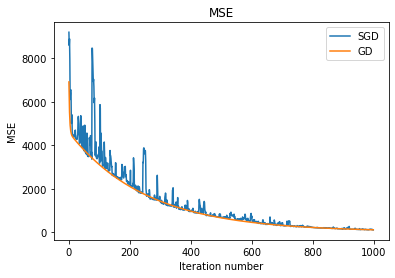

In [157]:
plt.plot(range(len(errors_2)), errors_2, label = "SGD")
plt.plot(range(len(errors_1)), errors_1, label = "GD")
plt.legend()
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

При градиентном спуске ошибка падает монотонно, а при стохастическом градиентном спуске - нет, то опускаясь, то резко возрастая. При этом в обоих случаях понадобилось выполнить 1000 итераций, чтобы получить относительно низкое значение ошибки.